# Project 2 - Classification of Myocardial Infarction

### Myocardial Infarction(Commonly known as “Heart attack”)  is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which are exposed to chronic stress factors, irregular and not always balanced nutrition.

### The Given dataset consists of 124 variables with 1700 records of patients. Classify the Lethal outcome (cause) (LET_IS)(Y variable) by using the given dataset.


 - Importing Labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
df = pd.read_csv('Myocardial infarction complications.csv')


In [6]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(1700, 124)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [4]:
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Data Preprocessing

## Treating Null Values
- Uding median value because most of the features are categorical

In [13]:
df = df.fillna(df.median())

In [14]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
## As ID Column doesn't have any information its only for the reference of patient. So, we will drop that coloum.

df = df.iloc[:,1:]
df.head()

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
## Converting the all values in the form of a array

DF = df.values
DF

array([[1., 2., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 3., 6., ..., 1., 0., 6.],
       [0., 2., 2., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.]])

In [17]:
## Normalizig the numerial data

df_normal = scale(DF)
df_normal

array([[ 0.77216846,  1.73022388, -0.51769504, ..., -0.32121605,
        -0.30880548, -0.34534162],
       [ 0.77216846,  0.53405446, -0.93718101, ..., -0.32121605,
        -0.30880548, -0.34534162],
       [ 0.77216846, -0.66211495, -0.93718101, ..., -0.32121605,
        -0.30880548, -0.34534162],
       ...,
       [ 0.77216846,  2.9263933 ,  1.57973481, ...,  3.11316943,
        -0.30880548,  3.99804251],
       [-1.29505419,  1.73022388, -0.09820907, ..., -0.32121605,
        -0.30880548,  0.37855573],
       [ 0.77216846,  1.73022388, -0.51769504, ..., -0.32121605,
        -0.30880548,  0.37855573]])

In [18]:
pca = PCA()

In [19]:
pca_values = pca.fit_transform(df_normal)
pca_values

array([[ 6.35742020e-01, -2.09788000e+00, -1.57071286e+00, ...,
         2.06090325e+00,  1.50958303e-01,  5.38345350e-03],
       [-1.37719102e+00,  1.71293608e+00,  1.59573155e+00, ...,
        -1.74529429e-01,  5.80858058e-01,  4.67419620e-05],
       [-1.84242159e+00, -2.88791433e+00,  4.14083555e+00, ...,
         2.60999236e-01, -7.24791205e-01,  1.01685129e-02],
       ...,
       [ 2.14076152e+00, -4.40055021e-02,  2.92337758e+00, ...,
        -1.39343136e-01,  3.01045853e-02,  4.32268424e-03],
       [ 6.71954066e+00, -2.42174388e+00, -3.12418415e+00, ...,
        -7.34359644e-01, -3.11012697e-01,  1.52215675e-02],
       [ 7.02570169e+00,  5.08385341e+00,  1.82445538e+00, ...,
        -2.76087873e-01,  2.36669393e-01,  3.64139822e-03]])

In [20]:
# Amount of variance that each PCA explains is
pca.explained_variance_

array([4.03028543e+00, 3.78544248e+00, 3.17622665e+00, 2.85504423e+00,
       2.55873960e+00, 2.24405799e+00, 2.09434282e+00, 1.90670254e+00,
       1.87343814e+00, 1.80121455e+00, 1.70726804e+00, 1.67140957e+00,
       1.63712519e+00, 1.61876164e+00, 1.57609780e+00, 1.55487691e+00,
       1.47210050e+00, 1.46483935e+00, 1.42741166e+00, 1.42011652e+00,
       1.40920219e+00, 1.39393718e+00, 1.37334185e+00, 1.34580231e+00,
       1.34456249e+00, 1.29735893e+00, 1.28867987e+00, 1.27454261e+00,
       1.25102492e+00, 1.23750515e+00, 1.22405980e+00, 1.20857814e+00,
       1.19486072e+00, 1.17699827e+00, 1.17073304e+00, 1.16771825e+00,
       1.15612404e+00, 1.13859832e+00, 1.11901552e+00, 1.10869963e+00,
       1.09283267e+00, 1.08009468e+00, 1.07502907e+00, 1.06021289e+00,
       1.05278993e+00, 1.04621866e+00, 1.03940881e+00, 1.02969248e+00,
       1.02114160e+00, 1.01556637e+00, 1.00172899e+00, 9.91574229e-01,
       9.78458293e-01, 9.71676387e-01, 9.67704424e-01, 9.60305055e-01,
      

In [21]:
# Amount of variance that each PCA explains by ratio is

var = pca.explained_variance_ratio_
var

array([3.30156941e-02, 3.10099651e-02, 2.60193302e-02, 2.33882360e-02,
       2.09609382e-02, 1.83830980e-02, 1.71566463e-02, 1.56195160e-02,
       1.53470174e-02, 1.47553689e-02, 1.39857685e-02, 1.36920196e-02,
       1.34111654e-02, 1.32607330e-02, 1.29112351e-02, 1.27373957e-02,
       1.20592997e-02, 1.19998170e-02, 1.16932132e-02, 1.16334521e-02,
       1.15440430e-02, 1.14189936e-02, 1.12502787e-02, 1.10246776e-02,
       1.10145211e-02, 1.06278342e-02, 1.05567362e-02, 1.04409252e-02,
       1.02482707e-02, 1.01375181e-02, 1.00273751e-02, 9.90055091e-03,
       9.78817919e-03, 9.64185182e-03, 9.59052768e-03, 9.56583076e-03,
       9.47085220e-03, 9.32728324e-03, 9.16686291e-03, 9.08235614e-03,
       8.95237560e-03, 8.84802726e-03, 8.80653037e-03, 8.68515766e-03,
       8.62434952e-03, 8.57051833e-03, 8.51473273e-03, 8.43513757e-03,
       8.36508958e-03, 8.31941782e-03, 8.20606339e-03, 8.12287664e-03,
       8.01543221e-03, 7.95987552e-03, 7.92733759e-03, 7.86672270e-03,
      

In [22]:
var1 = np.cumsum(np.round(var, decimals = 4)*100)
var1

array([ 3.3 ,  6.4 ,  9.  , 11.34, 13.44, 15.28, 17.  , 18.56, 20.09,
       21.57, 22.97, 24.34, 25.68, 27.01, 28.3 , 29.57, 30.78, 31.98,
       33.15, 34.31, 35.46, 36.6 , 37.73, 38.83, 39.93, 40.99, 42.05,
       43.09, 44.11, 45.12, 46.12, 47.11, 48.09, 49.05, 50.01, 50.97,
       51.92, 52.85, 53.77, 54.68, 55.58, 56.46, 57.34, 58.21, 59.07,
       59.93, 60.78, 61.62, 62.46, 63.29, 64.11, 64.92, 65.72, 66.52,
       67.31, 68.1 , 68.89, 69.66, 70.41, 71.16, 71.91, 72.64, 73.37,
       74.09, 74.8 , 75.51, 76.21, 76.9 , 77.59, 78.25, 78.91, 79.56,
       80.2 , 80.84, 81.46, 82.07, 82.67, 83.27, 83.86, 84.45, 85.02,
       85.59, 86.15, 86.7 , 87.24, 87.78, 88.31, 88.83, 89.35, 89.86,
       90.36, 90.85, 91.33, 91.8 , 92.26, 92.72, 93.17, 93.61, 94.04,
       94.45, 94.85, 95.23, 95.61, 95.98, 96.34, 96.68, 97.01, 97.32,
       97.63, 97.92, 98.19, 98.45, 98.7 , 98.92, 99.13, 99.33, 99.51,
       99.65, 99.77, 99.87, 99.96, 99.96])

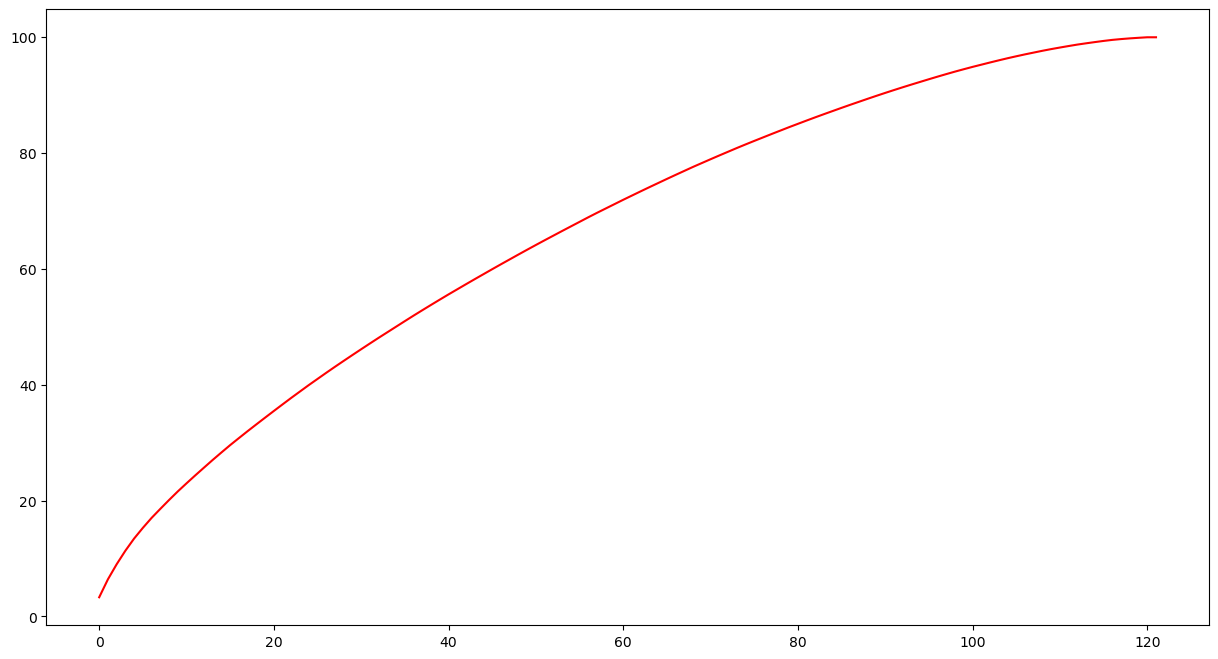

In [24]:
plt.figure(figsize=[15,8])
plt.plot(var1, color = 'red')

plt.show()